<a href="https://colab.research.google.com/github/sakarla/Machine-Learning-for-Architecs/blob/main/week%202_3_DataCollection/Notebook%20code/data_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lesson Plan: Data Collection with Python**
In this notebook, you will learn how to collect data from the web using different tools and methods.

Our Pipeline:
1. Introduction (Why Data Collection Matters)
2.  Setting Up Google Drive
3.  Data Collection with different libraries
   *  Request
   *  Beautiful Soup
   *  Scrapy
      *  Text
      *  Image
   *  Reading a CSV file




# **1. Introduction to Data collection**

Data collection is the process of gathering and storing information according to your project needs in order to answer the question you want to answer. It is a vital part of many projects because it produces raw materials.

Data collection is like gathering pieces of a puzzle. When you have all the pieces, you can see the whole picture and make informed decisions.
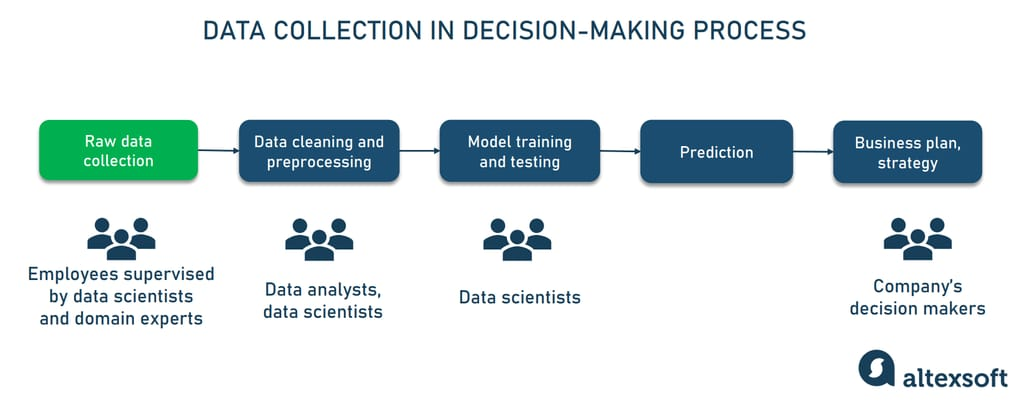

The data collection process allows data scientists to build and train machine learning and deep learning algorithms.

# **2. Setting Up Google Drive**
Before we start collecting data, it's often helpful to store and access files directly from **Google Drive**. By connecting Google Colab to Google Drive, we can easily load, save, and manage our data files.

This is useful if you want to work with files that are too large to upload directly to Colab or if you want to save your work for later use.



**Step 1:** We start by importing the drive module from google.colab. This module helps us connect to Google Drive from Colab.

**Step 2:** We use the mount function to connect to Google Drive. When we run this code, Colab will ask for permission to access your Google Drive account.

**Step3:** Create your folder.we create folder with name 'collecting data' on the google drive.

You’ll see a link that says 'Go to this URL in your browser'. Click on it and sign in with your Google account. Once you grant permission, you’ll be able to access your Drive files directly from Colab.

In [ ]:
# Import the necessary library
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create a folder named 'collecting data' in Google Drive
!mkdir '/content/drive/MyDrive/Colab Notebooks/collecting data'



In [ ]:
# Change the current working directory to the 'collecting data' folder
%cd '/content/drive/MyDrive/Colab Notebooks/collecting data'


# **3. Data Collection with different libraries**

We can collect data from various sources using Python. We will cover a few common methods: loading data from a CSV file, scraping data from the web, and colllecting image URL.



Now, lets get started with scraping data from web.
The first powerful method for doing this: making HTTP requests using the `requests` library.

#  **3.1 Request**

With this method, we target a website and define what data must be collected. Then, we extract and analyze the source code, build a scraper in Python, and finally structure our data.

Requests library is great for making HTTP requests. You can use it to interact with APIs and fetch data from web services.

For this example, we’ll use a URL from ArchDaily, a website that features architectural projects. But you can change the URL to any website you want to practice with.
```
url = 'https://www.archdaily.com/1012067/terzetto-house-conform-architects?ad_content=1012067&ad_medium=widget&ad_name=featured_loop_main'
```
If the request is successful, we extract the HTML content of the page.

In [ ]:
# Import the 'requests' library, which is used for making HTTP requests
import requests

###########################################################################################################################################
# variable url stores the web address (URL) of the page  which we want to extract text.
url = 'https://www.archdaily.com/1012067/terzetto-house-conform-architects?ad_content=1012067&ad_medium=widget&ad_name=featured_loop_main'
###########################################################################################################################################


#we use the requests.get(url) command to send a request to the web server and retrieve the web page.
response = requests.get(url)

#  we check if the response from the web server has a status code of 200, which means the request was successful. If not, it prints an error message.
if response.status_code == 200:
    # If successful, store the HTML content of the page in the 'data' variable
    data = response.text
    print(data)  # Print the HTML content to the console
else:
    # If the response status code is not 200, print an error message with the specific status code
    print(f"Error: {response.status_code}")

After retrieving the HTML content of the webpage, the next step is to analyze and structure the data. This involves parsing the HTML code to extract specific information, like text, images, or links.

# **3.2 BeautifulSoup**


Now, we’ll take it a step further by using a library called **BeautifulSoup**. This library helps us parse HTML and XML documents, making it easier to extract specific information from a webpage.

For example, if we want to collect all the text inside `<p>` tags (paragraphs) on a webpage, BeautifulSoup allows us to do that in a simple and efficient way.

For this example, we’ll use a webpage from ArchDaily. But remember, you can change the URL to any webpage you want to practice with.

In [ ]:
#this code is designed to extract text from a website and save it for later use.
#this code uses two libraries: requests for making web requests and BeautifulSoup for parsing web pages.
'''
Json  is a lightweight data-interchange format that is easy for humans to read and write and easy
for machines to parse and generate. JSON is often used for data exchange between a server and a web application,
 as well as for configuration files and data storage.
'''

# Import the necessary libraries
import requests
from bs4 import BeautifulSoup
import json

# variable url stores the web address (URL) of the page from which we want to extract text.

#####################################################
url = 'https://www.archdaily.com/1012067/terzetto-house-conform-architects?ad_content=1012067&ad_medium=widget&ad_name=featured_loop_main'
#####################################################

#we use the requests.get(url) command to send a request to the web server and retrieve the web page.
response = requests.get(url)

#  we check if the response from the web server has a status code of 200, which means the request was successful. If not, it prints an error message.
if response.status_code == 200:

    #we call BeautifulSoup lib. this library helps parse the HTML content of the web page, making it easier to work with.
    soup = BeautifulSoup(response.text, 'html.parser')

    #it searches for all the paragraphs (<p>) on the web page and stores them in the paragraphs variable.
    paragraphs = soup.find_all('p')

    # iterates through all paragraphs on the website and print their text using paragraph.get_text(). This is what you see displayed on the screen.
    for paragraph in paragraphs:
        print(paragraph.get_text())

    # save the extracted text to a text file named extracted_text.txt
    with open('extracted_text.txt', 'w', encoding='utf-8') as file:
      #each paragraph is written on a separate line in the file.
        for paragraph in paragraphs:
            file.write(paragraph.get_text() + '\n')

    # Create a list to store extracted text
    extracted_text = [paragraph.get_text() for paragraph in paragraphs]

    # also save the extracted text to a JSON file named extracted_text.json
    with open('extracted_text.json', 'w', encoding='utf-8') as file:
        json.dump(extracted_text, file, ensure_ascii=False, indent=2)
else:
    print(f"Error: {response.status_code}")

With just a few lines of code, we’ve managed to extract all the text from paragraphs on a webpage and save it for later use. This combination of requests and BeautifulSoup is powerful for web scraping, allowing us to collect and structure data in a meaningful way.

# **Exercise 1: in class**

Change the three times the URL and save the output into one JSON. you need to just copy the code in last part and change URLS.

In [ ]:
#first url
#copy code here


In [ ]:
#second  url
#copy code here


In [ ]:
#Third  url
#copy code here


# **3.3.  Scrapy**
So far, we have looked at web scraping using the **requests** and **BeautifulSoup** libraries, which are great for simple tasks. However, when we need to scrape data from multiple pages or handle more complex websites, a more powerful tool like **Scrapy** is needed.

Scrapy is a robust framework for web scraping. It allows us to automate the process of crawling through websites, extracting data, and saving it in a structured format.

I will show you how to set up a Scrapy project and run a spider to collect data.

Before we start scraping with Scrapy, we need to set up a folder. the folder is where all the files related to our scraping task will be stored. This includes the spiders (which are scripts that tell Scrapy what to do), settings, and the output data.

To create a new Scrapy project, we use a simple command that will generate all the necessary files and folders for us.

In [ ]:
# Install Scrapy
!pip install scrapy

# Create a new Scrapy project named 'myproject'
!scrapy startproject myproject


**Step 1:** First, we install Scrapy using pip. This command installs the Scrapy framework in our environment.

**Step 2:** We create a new Scrapy project using the command
`!scrapy startproject myproject`.


 This will create a folder named ***myproject*** containing all the necessary files for our Scrapy project.




Download the spider file **myspider_text.py**  and put it on *`myproject > myproject > spiders`* directory.

Now that we have our project set up and our spider script in place, we can run the spider to start scraping data. Scrapy spiders are powerful because they can crawl multiple pages automatically, follow links, and extract the information we need.



# **3.3.1  Scrap Text**

Download the spider file **myspider_text.py**  and put it on *`myproject > myproject > spiders`* directory.

Now that we have our project set up and our spider script in place, we can run the spider to start scraping data.

In this example, we’ll run a spider named **my_spider_text**, and we’ll save the scraped data to a JSON file called **output_text.json**.



In [ ]:
'''This command is used to run a Scrapy spider named "my_spider" within the "myproject" Scrapy project
and save the scraped data to an output JSON file named "output_text.json."'''


##################################################
!cd myproject && scrapy crawl my_spider_text -o output_text.json
##################################################

**Step 1:** We use the command scrapy crawl followed by the name of our spider (my_spider_text) to start the spider.

**Step 2:** We add the -o output_text.json flag to save the scraped data to a JSON file. This means all the data our spider collects will be structured and stored in a file called output_text.json.

# **Exercise 2: at home**

Change **10** times the URL on the file named myspider_text.py saved on the directory `myproject/myproject/spiders`

on this line:

*`start_urls = ['https://www.archdaily.com/882553/luminous-transparent-mixed-use-tower-will-mark-the-skyline-of-saint-malo?ad_medium=widget&ad_name=category-apartments-article-show']`*

Every time you change the URL, please also change the **output name** to match the URL name; at the end, you will have 10 JSON.

# **3.3.1  Scrap Images**

In addition to collecting text data, Scrapy is also powerful enough to scrape images from websites. This can be especially useful if you’re working on a project that requires downloading and storing images from the web for analysis or use in machine learning models.

To start collecting images, we first need to create or select a spider file that is specifically designed for scraping images. This spider will contain the logic needed to locate and download images from a webpage.

Download the spider file **myspider_image.py** and put it on *`myproject > myproject > spiders`* directory.

The process is very similar to scraping text data, but this time the spider will look for image files (usually within `<img>` tags) and download them.

Let’s use the following command to run our image spider. The command will save the extracted data to a JSON file, which will include the URLs of the images.

In [ ]:
# To run the spider, use the following command in a cell
#archdaily_images should be replaced with the actual name of your spider.
#-o output2.json specifies that the spider's output should be saved to a JSON file named output2.json. You can change the file name to whatever you prefer.

#The spider will start crawling the specified URL, and the extracted data will be saved to the JSON file in the project directory.
!cd myproject && scrapy crawl my_spider_img -o output_images.json

# **Exercise 3: at home**

Use the same ten URLS from the last exercise, and change them as well on the `my_spider_img.py` file on this line of code




```
start_urls = ['https://www.archdaily.com/1012067/terzetto-house-conform-architects?ad_content=1012067&ad_medium=widget&ad_name=featured_loop_main']

```

Please also replace the output file name (`output.json`)with the name that you want.



# **3.4 Loading Data from a CSV File**
 Imagine you have a spreadsheet of information that you want to analyze using Python.
 CSV  files are one of the most common formats for storing and exchanging data. We can easily read data from a CSV file using the pandas library in Python.

 we'll see how to load a CSV file into a pandas DataFrame, and then we'll visualize this data on a map using the geopandas library.

First, let's read the data from a CSV file. The CSV file contains information such as coordinates (latitude and longitude) that we will later use to plot on a map. The data is loaded into a pandas DataFrame, which is a table-like structure in Python.

In [ ]:
import pandas as pd

# This line reads data from a CSV file located at the specified path.
# The path to the CSV file is '/content/drive/MyDrive/Colab Notebooks/data_bus.csv', but you should replace this with the actual path to your CSV file.
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/collecting data/data_bus.csv')

# Print the data to see what it looks like
print(data)


**Step 1:** We start by importing the pandas library, which provides tools for working with structured data like tables.

**Step 2:** We use the pd.read_csv() function to read the data from the CSV file into a pandas DataFrame. The file path in this example is /content/drive/MyDrive/Colab Notebooks/data_bus.csv. You should replace this with the actual path to your CSV file.

Now that we've loaded our data, let's visualize it on a map. We'll use the geopandas library, which extends pandas to handle spatial data and perform geographic operations. Our goal is to plot points on a map based on the coordinates in our CSV file.

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Create a list of Point objects based on the Longitude and Latitude columns in the DataFrame
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]

# Create a GeoDataFrame using the original data and the geometry (points)
gdf = GeoDataFrame(data, geometry=geometry)

# Load a world map from GeoPandas' built-in datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the data points on the map
gdf.plot(ax=world.plot(figsize=(20, 10)), marker='o', color='red', markersize=15)


**Step 1:** We import necessary libraries: pandas for data handling, shapely.geometry.Point to create points from coordinates, and geopandas for geographic data manipulation.

**Step 2:** We create a list of Point objects using the Longitude and Latitude columns from our DataFrame. Each point represents a specific location on the map.

**Step 3:** We create a GeoDataFrame by combining our original data with the geometry list. This allows us to treat the coordinates as spatial data.

**Step 4:** We load a world map from GeoPandas' built-in datasets. This map will serve as the background for plotting our data points.

**Step 5:** Finally, we plot the points on the map using the gdf.plot() function. The points are marked in red, and the size of the markers can be adjusted using the markersize parameter.